## Example Keras code adapted from https://www.tensorflow.org/tutorials/keras/basic_classification

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.3


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt', 'Trousers', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [5]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(np.arange(0,10,1))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [6]:
def predict_single(model, images, index):
    img = (np.expand_dims(images[index],0))
    prediction = model.predict(img)
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plot_image(0, prediction, (np.expand_dims(test_labels[index],0)), (np.expand_dims(test_images[index],0)))
    plt.subplot(1,2,2)
    plot_value_array(0, prediction,  (np.expand_dims(test_labels[index],0)))
    plt.xticks(range(10), class_names, rotation=45)
    plt.show()
    return np.argmax(prediction[0])

### Clean-up old Tensorboard logs

In [7]:
!rm -rf ./logs/ 

In [8]:
log_dir="logs/bcm/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

## Example Classification Model with Convolution

In [9]:
train_images_res = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images_res = test_images.reshape((test_images.shape[0], 28, 28, 1))
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='lecun_uniform', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=176, activation=tf.nn.relu),
    keras.layers.Dense(units=10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images_res, train_labels, epochs=10, validation_data=(test_images_res, test_labels), callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.3808 - accuracy: 0.8668 - val_loss: 0.3153 - val_accuracy: 0.8857
Epoch 2/10
1875/1875 [==============================] - 91s 49ms/step - loss: 0.2451 - accuracy: 0.9105 - val_loss: 0.2766 - val_accuracy: 0.9025
Epoch 3/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1963 - accuracy: 0.9271 - val_loss: 0.2681 - val_accuracy: 0.9062
Epoch 4/10
1875/1875 [==============================] - 70s 38ms/step - loss: 0.1639 - accuracy: 0.9385 - val_loss: 0.2504 - val_accuracy: 0.9140
Epoch 5/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1350 - accuracy: 0.9500 - val_loss: 0.2703 - val_accuracy: 0.9127
Epoch 6/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1119 - accuracy: 0.9586 - val_loss: 0.2842 - val_accuracy: 0.9137
Epoch 7/10
1875/1875 [==============================] - 70s 38ms/step - loss: 0.0927 - accuracy: 0.9653 - val_loss: 0.2963 

In [10]:
predictions = model.predict(test_images_res)

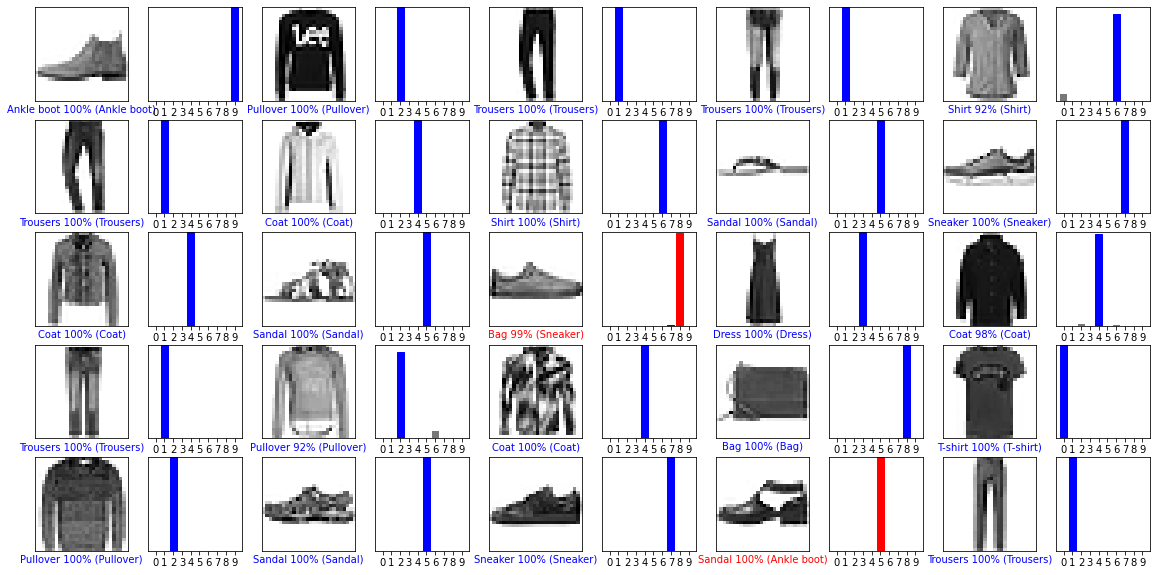

In [11]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

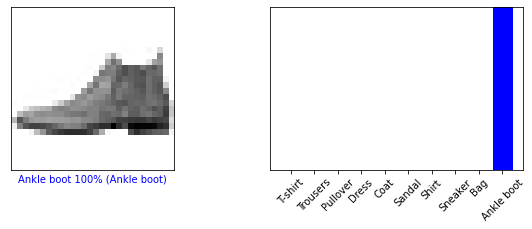

'Ankle boot'

In [12]:
i = 0
class_names[predict_single(model, test_images_res, i)]

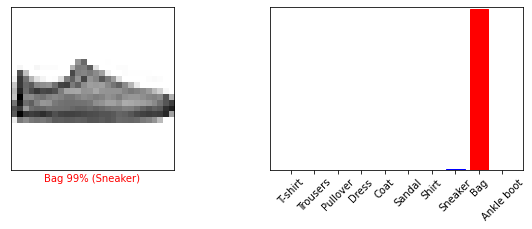

'Bag'

In [13]:
i = 12
class_names[predict_single(model, test_images_res, i)]

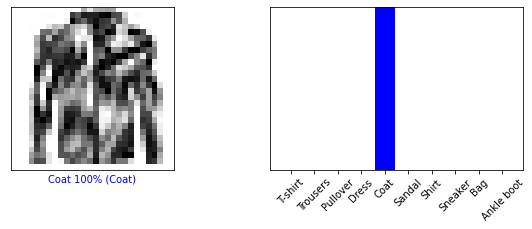

'Coat'

In [14]:
i = 17
class_names[predict_single(model, test_images_res, i)]